In [16]:
import sys; sys.path.append("../../..")
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

from helpers import plot_image, read_image

## Read Image

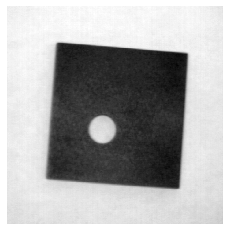

In [17]:
im = read_image("../../../images/wdg2.png", convert_grayscale=True)
plot_image(im, plt.gca(), cmap="gray")

## Well Known Gradients

### Sobel

In [18]:
def normalize(x):
    min_v, max_v = x.min(), x.max()
    return (x - min_v) / (max_v - min_v) * 255

#### From X and Y direction separately

In [19]:
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]], dtype=np.float32) / 8
sobel_y = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]], dtype=np.float32) / 8

In [20]:
grad_x = correlate2d(im, sobel_x)
grad_y = correlate2d(im, sobel_y)

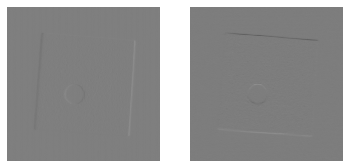

In [21]:
fig, ax = plt.subplots(1, 2)
plot_image(grad_x, ax[0], cmap="gray")
plot_image(grad_y, ax[1], cmap="gray")

#### X and Y directions together

_Magnitude_: $|G|=\sqrt {G_x^2 + G_y^2}$, or an approximate magnitude is computed using $|G|=|G_x|+|G_y|$ which is much faster to compute.

_Angle_: $\theta=arctan(G_y/G_x)$, in this case, orientation 0 is taken to mean that the direction of maximum contrast from black to white runs from left to right on the image, and other angles are measured anti-clockwise from this

In [22]:
grad = np.sqrt(np.square(grad_x) + np.square(grad_y))

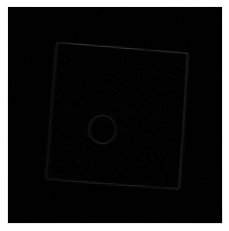

In [23]:
plot_image(grad, plt.gca(), cmap="gray")

### Prewitt

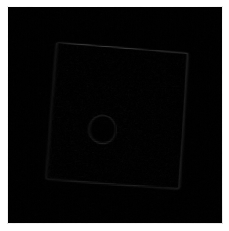

In [24]:
prewitt_x = np.array([[-1, 0, 1], 
                      [-1, 0, 1], 
                      [-1, 0, 1]], dtype=np.float32) / 6
prewitt_y = np.array([[-1, -1, -1], 
                      [0, 0, 0], 
                      [1, 1, 1]], dtype=np.float32) / 6
grad_x = correlate2d(im, prewitt_x)
grad_y = correlate2d(im, prewitt_y)
grad = np.sqrt(np.square(grad_x) + np.square(grad_y))
plot_image(grad, plt.gca(), cmap="gray")

### Roberts

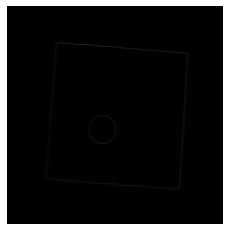

In [25]:
roberts_x = np.array([[0, 1], 
                      [-1, 0]], dtype=np.float32) / 2
roberts_y = np.array([[1, 0], 
                      [0, -1]], dtype=np.float32) / 2
grad_x = correlate2d(im, roberts_x)
grad_y = correlate2d(im, roberts_y)
grad = np.sqrt(np.square(grad_x) + np.square(grad_y))
plot_image(grad, plt.gca(), cmap="gray")

## Gradient Directions / Angle

#### Raw Image

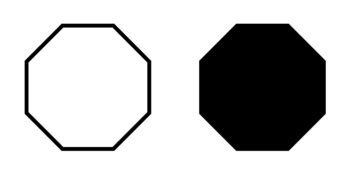

In [26]:
im = read_image("../../../images/octagon.png", convert_grayscale=True)
plot_image(im, plt.gca(), cmap="gray", interpolation="bilinear")

#### Compute Gradient and Direction

In [27]:
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]], dtype=np.float32) / 8
sobel_y = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]], dtype=np.float32) / 8
grad_x = correlate2d(im, sobel_x)
grad_y = correlate2d(im, sobel_y)
grad_magnitude = np.sqrt(np.square(grad_x) + np.square(grad_y))
grad_direction = np.arctan2(grad_y, grad_x)

#### Visualize Gradients

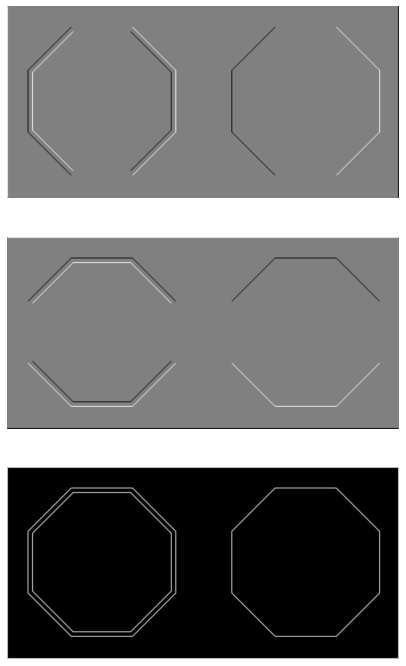

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))
plot_image(grad_x, ax[0], cmap="gray", interpolation="bilinear")
plot_image(grad_y, ax[1], cmap="gray", interpolation="bilinear")
plot_image(grad_magnitude, ax[2], cmap="gray", interpolation="bilinear")

#### Visualize Directions

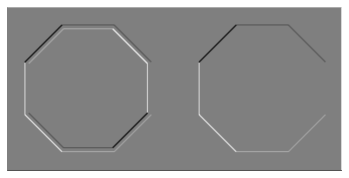

In [29]:
plot_image(((grad_direction + np.pi) / (2 * np.pi) * 255).astype(np.uint8), plt.gca(), cmap="gray", interpolation="bilinear")

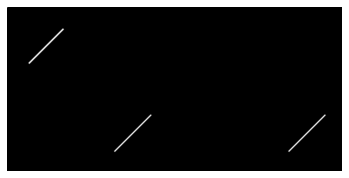

In [30]:
selected = np.zeros_like(grad_magnitude)
selected[(grad_direction > 30 * np.pi / 180) & (grad_direction < 60 * np.pi / 180)] = 255
plot_image(selected, plt.gca(), cmap="gray", interpolation="bilinear")